In [111]:
## Import blibliotecas por utilizar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import MultiIndex

In [112]:
## cargando los datos hacia un Pandas dataframe
dataset = pd.read_excel('data/datos_prueba.xlsx')
dataset.head(n=10)

,CLASE,MEDIDA DEL ANCHO,MEDIDA DE LA MASA
0,SALMON,34,20
1,ROBALO,36,21
2,ROBALO,40,21
3,SALMON,26,18
4,ROBALO,35,20
5,SALMON,27,18
6,SALMON,25,21
7,SALMON,27,18
8,ROBALO,35,23
9,ROBALO,31,23


In [113]:
## Describe dataset
dataset.describe(include='all')

,CLASE,MEDIDA DEL ANCHO,MEDIDA DE LA MASA
count,69,69.000000,69.000000
unique,2,NaN,NaN
top,ROBALO,NaN,NaN
freq,38,NaN,NaN
mean,NaN,32.565217,20.333333
std,NaN,4.041979,1.400280
min,NaN,25.000000,18.000000
25%,NaN,30.000000,19.000000
50%,NaN,32.000000,20.000000
75%,NaN,35.000000,21.000000


In [114]:
## escalamiento  rango de 0 a 1
## salmon = 0
## robalo = 1
train_dataset = dataset
train_dataset['CLASE'] = pd.factorize(train_dataset['CLASE'])[0]
train_dataset.head(n=10)

,CLASE,MEDIDA DEL ANCHO,MEDIDA DE LA MASA
0,0,34,20
1,1,36,21
2,1,40,21
3,0,26,18
4,1,35,20
5,0,27,18
6,0,25,21
7,0,27,18
8,1,35,23
9,1,31,23


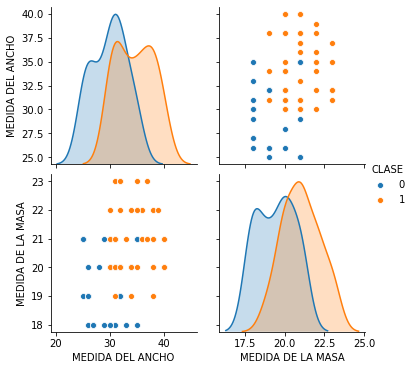

In [115]:
## Plot the data using seaborn pairplot
sns.pairplot(train_dataset, hue='CLASE')

In [116]:
# creating input features and target variables
X=train_dataset.iloc[:,1:3]
X.head()

,MEDIDA DEL ANCHO,MEDIDA DE LA MASA
0,34,20
1,36,21
2,40,21
3,26,18
4,35,20


In [117]:
y=train_dataset.iloc[:,0]
y.head()

0    0
1    1
2    1
3    0
4    1
Name: CLASE, dtype: int64

In [118]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.35757086, -0.23979158],
       [ 0.85600297,  0.47958315],
       [ 1.85286718,  0.47958315],
       [-1.63615757, -1.67854103],
       [ 0.60678691, -0.23979158],
       [-1.38694151, -1.67854103],
       [-1.88537362,  0.47958315],
       [-1.38694151, -1.67854103],
       [ 0.60678691,  1.91833261],
       [-0.3900773 ,  1.91833261],
       [ 0.35757086,  1.19895788],
       [-0.14086125, -0.23979158],
       [-0.14086125,  1.91833261],
       [ 0.60678691,  0.47958315],
       [-0.14086125, -0.23979158],
       [-0.63929335, -0.23979158],
       [ 0.35757086, -0.23979158],
       [-0.63929335, -0.23979158],
       [-0.3900773 , -0.23979158],
       [ 1.85286718, -0.23979158],
       [-0.14086125, -0.9591663 ],
       [-0.3900773 ,  0.47958315],
       [-0.63929335,  1.19895788],
       [-1.13772546, -0.23979158],
       [-0.14086125,  1.19895788],
       [ 0.60678691,  1.19895788],
       [ 1.10521902,  1.91833261],
       [ 1.10521902,  0.47958315],
       [-0.14086125,

In [125]:
## Dividir el dataset en training y test subdatasets 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [126]:
## Red neuronal
from keras import Sequential
from keras.layers import Dense

classifier = Sequential()

# First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=2))

#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [127]:
## Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [128]:
## Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=150)

Epoch 1/150
48/48 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 2/150
48/48 [==============================] - 0s 265us/step - loss: 0.6931 - accuracy: 0.5417
Epoch 3/150
48/48 [==============================] - 0s 264us/step - loss: 0.6931 - accuracy: 0.6458
Epoch 4/150
48/48 [==============================] - 0s 258us/step - loss: 0.6930 - accuracy: 0.7500
Epoch 5/150
48/48 [==============================] - 0s 317us/step - loss: 0.6930 - accuracy: 0.5417
Epoch 6/150
48/48 [==============================] - 0s 252us/step - loss: 0.6929 - accuracy: 0.6667
Epoch 7/150
48/48 [==============================] - 0s 298us/step - loss: 0.6929 - accuracy: 0.7083
Epoch 8/150
48/48 [==============================] - 0s 272us/step - loss: 0.6927 - accuracy: 0.8125
Epoch 9/150
48/48 [==============================] - 0s 316us/step - loss: 0.6927 - accuracy: 0.7917
Epoch 10/150
48/48 [==============================] - 0s 291us/step - loss: 0.6925 - accurac

In [129]:
## Evaluate the loss value & metrics values
eval_model=classifier.evaluate(X_train, y_train)
eval_model

48/48 [==============================] - 0s 2ms/step


[0.41567150751749676, 0.7916666865348816]

In [130]:
fig, ax = plt.subplots()
ax.hist(train_dataset['MEDIDA DEL ANCHO'].loc[train_dataset['CLASE'] == "SALMON"].values, ec='green', histtype='step', label='SALMON')
ax.hist(train_dataset['MEDIDA DEL ANCHO'].loc[dataset['CLASE'] == "ROBALO"].values, ec='red', histtype='step', label='ROBALO')
ax.legend(loc='upper left')
plt.title('Histograma del ancho de peces')
plt.xlabel('Ancho [m]')
plt.ylabel('Cantidad')
plt.show()

TypeError: invalid type comparison

### Summary per dimension

In [31]:
summary = dataset.groupby("CLASE").agg(['mean', 'std'])
summary.head()

MEDIDA DEL ANCHO           MEDIDA DE LA MASA          
                  mean       std              mean       std
CLASE                                                       
0            29.967742  3.177881         19.451613  1.150035
1            34.684211  3.401949         21.052632  1.161252

In [32]:
m = MultiIndex(levels=[['MEDIDA DEL ANCHO', 'MEDIDA DE LA MASA'], ['mean']],
           labels=[[0], [ 0]])

In [33]:
s = MultiIndex(levels=[['MEDIDA DEL ANCHO', 'MEDIDA DE LA MASA'], ['std']],
           labels=[[0], [ 0]])

In [34]:
means = [ i[-1] for i in summary[m].values.tolist()]
stdevs = [ i[-1] for i in summary[s].values.tolist()]
dist = pd.DataFrame(
    np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
    columns=['a', 'b'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

ImportError: matplotlib is required for plotting.

In [35]:
fig, ax = plt.subplots()
s = [dataset['MEDIDA DEL ANCHO'].loc[dataset['CLASE'] == "SALMON"], dataset['MEDIDA DEL ANCHO'].loc[dataset['CLASE'] == "ROBALO"]]
dataset_ancho = pd.concat([*s], axis=1)
dataset_ancho.columns = ["SALMON_ANCHO", "ROBALO_ANCHO"]
dataset_ancho.head()
dataset_ancho.plot.kde(ax=ax, legend=False, title='Histograma de anchos de: SALMON vs. ROBALO')
dataset_ancho.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probabilidad')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

TypeError: invalid type comparison

In [36]:
fig, ax = plt.subplots()
ax.hist(dataset['MEDIDA DE LA MASA'].loc[dataset['CLASE'] == "SALMON"].values, ec='green', histtype='step', label='SALMON')
ax.hist(dataset['MEDIDA DE LA MASA'].loc[dataset['CLASE'] == "ROBALO"].values, ec='red', histtype='step', label='ROBALO')
ax.legend(loc='upper left')
plt.title('Histograma de la masa de peces')
plt.xlabel('Masa [kg]')
plt.ylabel('Cantidad')
plt.show()

TypeError: invalid type comparison

In [37]:
fig, ax = plt.subplots()
s = [dataset['MEDIDA DE LA MASA'].loc[dataset['CLASE'] == "SALMON"], dataset['MEDIDA DE LA MASA'].loc[dataset['CLASE'] == "ROBALO"]]
dataset_ancho = pd.concat([*s], axis=1)
dataset_ancho.columns = ["SALMON_MASA", "ROBALO_MASA"]
dataset_ancho.head()
dataset_ancho.plot.kde(ax=ax, legend=False, title='Histograma de masas de: SALMON vs. ROBALO')
dataset_ancho.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probabilidad')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

TypeError: invalid type comparison

#### Referencias:
 - https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
 - https://medium.com/datadriveninvestor/building-neural-network-using-keras-for-classification-3a3656c726c1
